In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Base URL to work off                         
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to go through data
record = 0
sets = 1

# Create DataFrame
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | grytviken.
Processing Record 1  of Set 1 | banda aceh.
Processing Record 2  of Set 1 | thompson.
Processing Record 3  of Set 1 | invercargill.
Processing Record 4  of Set 1 | ercis.
Processing Record 5  of Set 1 | adamstown.
Processing Record 6  of Set 1 | butembo.
Processing Record 7  of Set 1 | port-aux-francais.
Processing Record 8  of Set 1 | argo.
Processing Record 9  of Set 1 | kirensk.
Processing Record 10  of Set 1 | codrington.
Processing Record 11  of Set 1 | eastham.
Processing Record 12  of Set 1 | petropavlovsk-kamchatsky.
Processing Record 13  of Set 1 | iqaluit.
Processing Record 14  of Set 1 | valdivia.
Processing Record 15  of Set 1 | waitangi.
Processing Record 16  of Set 1 | chauk.
Processing Record 17  of Set 1 | albany.
Processing Record 18  of Set 1 | keflavik.
Processing Record 19  of Set 1 | la passe.
Processing Record 20  of Set 1 | talnakh.
Processing Record 21  of Set 1 | k

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(weather_df)

# Show Record Count
city_data_df.count()

City                603
Country             603
Date                603
Latitude            603
Longitude           603
Cloudiness (%)      603
Humidity (%)        603
Max Temp (F)        603
Wind Speed (mph)    603
dtype: int64

In [7]:
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,grytviken,GS,2023-11-08 20:12:34,-54.2811,-36.5092,100,82,39.506,3.33
1,banda aceh,ID,2023-11-08 20:07:18,5.5577,95.3222,96,74,83.336,1.93
2,thompson,CA,2023-11-08 20:01:50,55.7435,-97.8558,75,74,28.832,3.09
3,invercargill,NZ,2023-11-08 20:06:24,-46.4,168.35,37,65,54.284,4.47
4,ercis,TR,2023-11-08 20:12:35,39.0287,43.3586,24,50,44.114,1.22


In [8]:
# Export the City_Data into a csv
# Define the directory path
output_directory = 'output_data'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
City_ID,,,,,,,,,
0,grytviken,GS,2023-11-08 20:12:34,-54.2811,-36.5092,100.0,82.0,39.506,3.33
1,banda aceh,ID,2023-11-08 20:07:18,5.5577,95.3222,96.0,74.0,83.336,1.93
2,thompson,CA,2023-11-08 20:01:50,55.7435,-97.8558,75.0,74.0,28.832,3.09
3,invercargill,NZ,2023-11-08 20:06:24,-46.4000,168.3500,37.0,65.0,54.284,4.47
4,ercis,TR,2023-11-08 20:12:35,39.0287,43.3586,24.0,50.0,44.114,1.22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

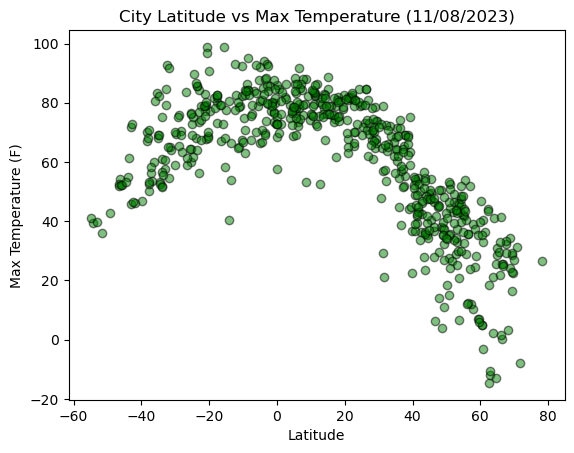

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
#Save the figure
plt.savefig("output_data/Fig1.png")

#### Latitude Vs. Humidity

Text(0.5, 1.0, 'City Latitude vs Humidity (%) (11/08/2023)')

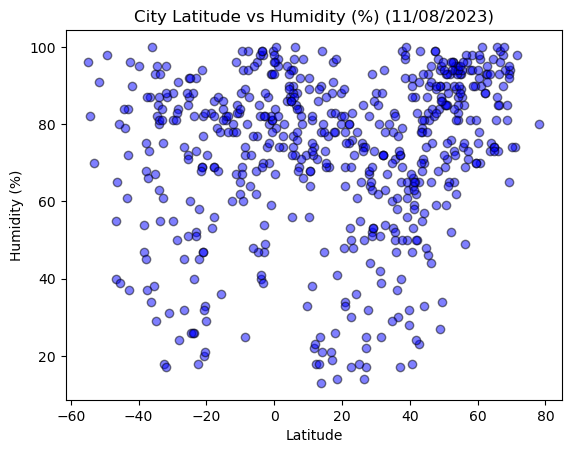

In [11]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")


#### Latitude Vs. Cloudiness

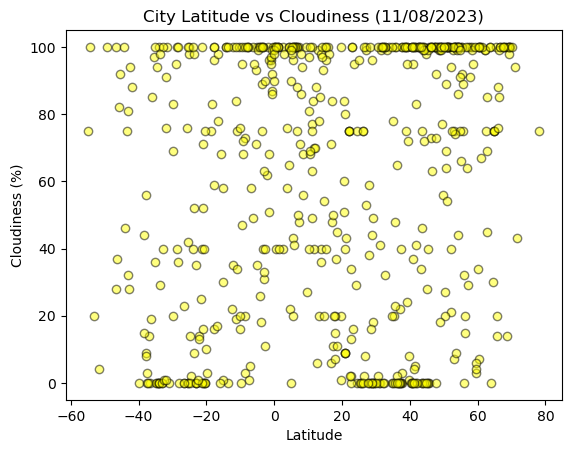

In [25]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="yellow", edgecolors="black", alpha = 0.5);
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})");

#### Latitude vs. Wind Speed Plot

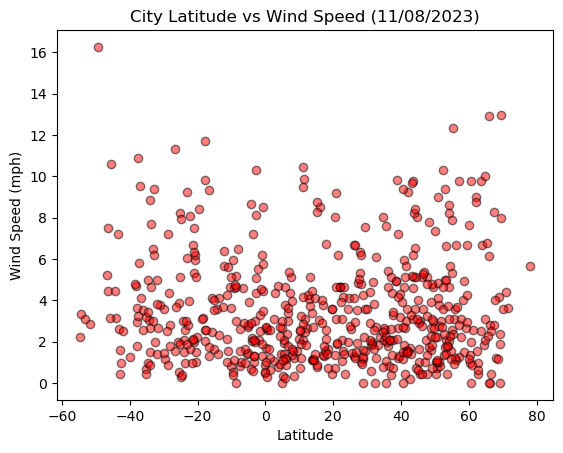

In [26]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="red", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})");

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) >=0, :]

# Display sample data
northern_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
1,banda aceh,ID,2023-11-08 20:07:18,5.5577,95.3222,96,74,83.336,1.93
2,thompson,CA,2023-11-08 20:01:50,55.7435,-97.8558,75,74,28.832,3.09
4,ercis,TR,2023-11-08 20:12:35,39.0287,43.3586,24,50,44.114,1.22
6,butembo,CD,2023-11-08 20:12:36,0.15,29.2833,100,96,57.794,1.7
8,argo,GR,2023-11-08 20:12:37,37.6333,22.7333,3,79,69.062,3.3


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) <= 0, :]

# Display sample data
southern_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,grytviken,GS,2023-11-08 20:12:34,-54.2811,-36.5092,100,82,39.506,3.33
3,invercargill,NZ,2023-11-08 20:06:24,-46.4,168.35,37,65,54.284,4.47
5,adamstown,PN,2023-11-08 20:12:36,-25.066,-130.1015,100,87,72.986,8.23
7,port-aux-francais,TF,2023-11-08 20:12:36,-49.35,70.2167,100,98,42.818,16.26
10,codrington,AU,2023-11-08 20:09:26,-38.2667,141.9667,44,54,67.064,4.69


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -1.03x + 91.33
The r-squared is: -0.8564363629077318
The regression displays a negative correlation.


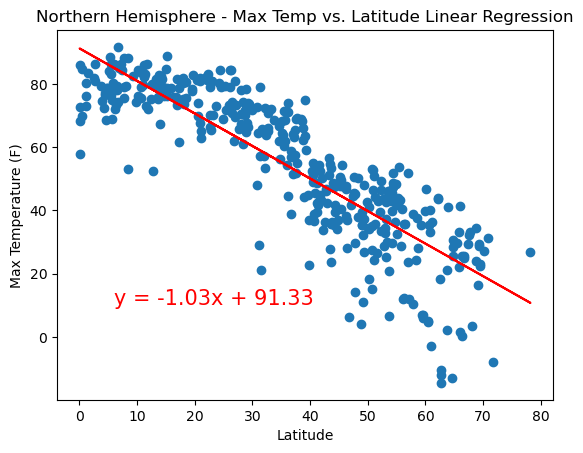

In [16]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")

plt.show()

Regression line equation is: y = 0.6x + 84.7
The r-squared is: 0.640426984441125
The regression displays a positive correlation.


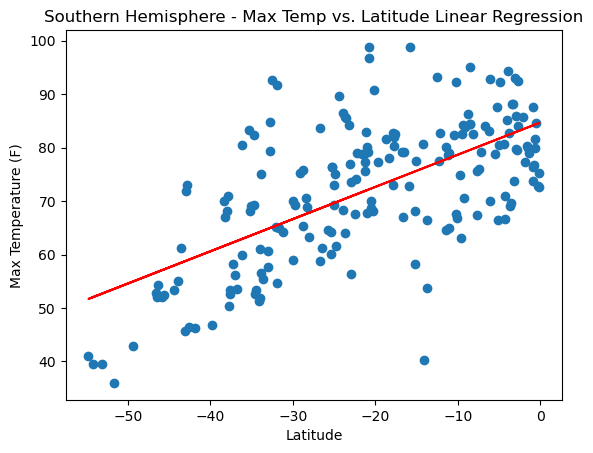

In [17]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.24x + 64.81
The r-squared is: 0.21977673453609076
The regression does not display much of a correlation between the data sets.


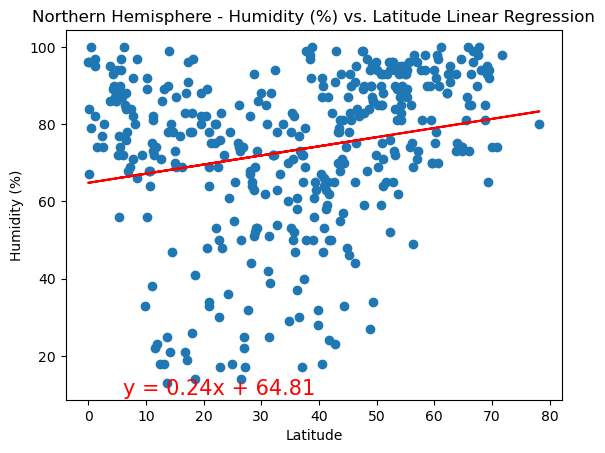

In [18]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

Regression line equation is: y = 0.18x + 74.22
The r-squared is: 0.11945693977195648
The regression does not display much of a correlation between the data sets.


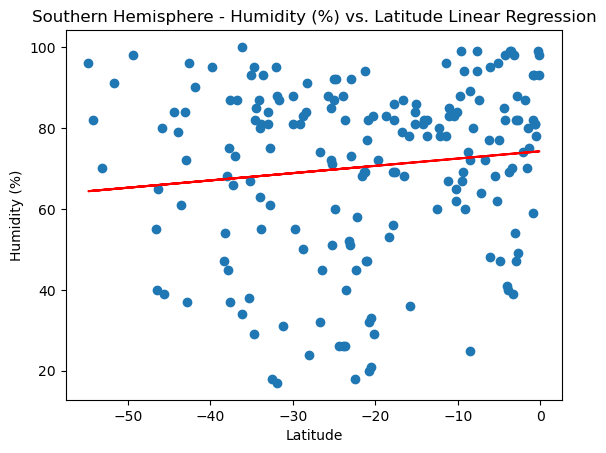

In [19]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.2x + 57.0
The r-squared is: 0.10012347318066989
The regression show a slight positive  correlation between the data sets.


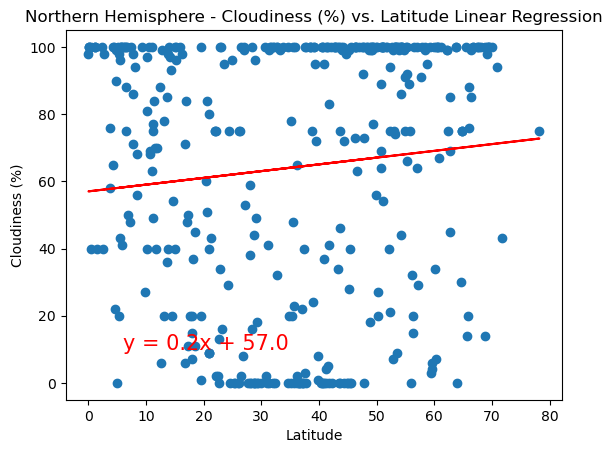

In [20]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression show a slight positive  correlation between the data sets.")
plt.show()

Regression line equation is: y = 0.68x + 67.18
The r-squared is: 0.2418154846504646
The regression does not displays a slight positive correlation between the data sets.


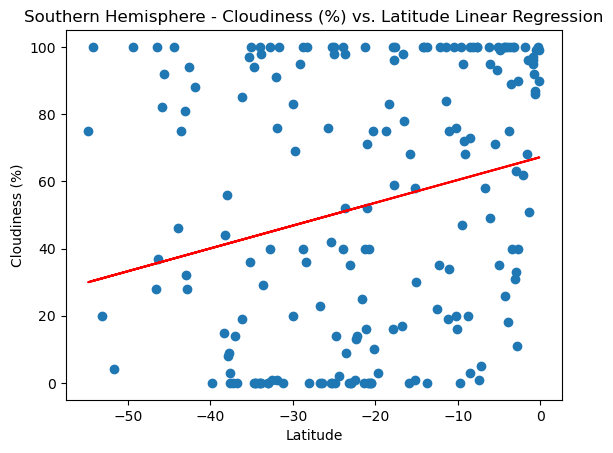

In [21]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not displays a slight positive correlation between the data sets.")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.02x + 2.51
The r-squared is: 0.17047249955043375
The regression does not display much of a correlation between the data sets.


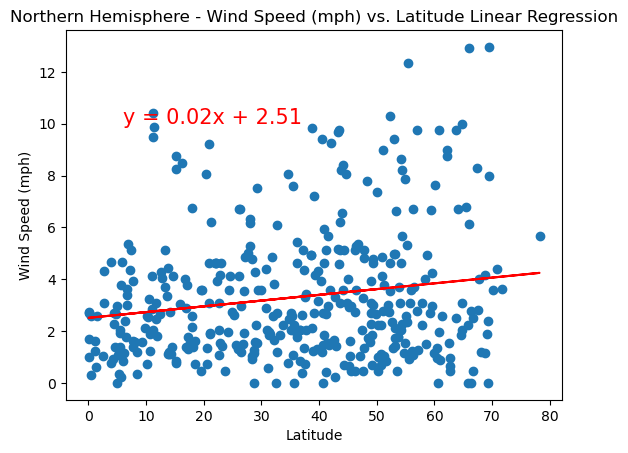

In [22]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

Regression line equation is: y = -0.03x + 3.2
The r-squared is: -0.1304007114896428
The regression does not display much of a correlation between the data sets.


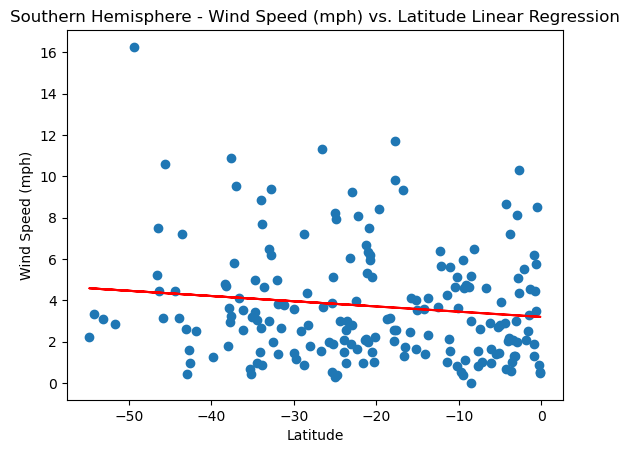

In [23]:
#Southern Hemisphere
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()